In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import scipy
import tabulate
from  matplotlib.ticker import FuncFormatter
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
from indic_transliteration import sanscript


sns.set_style("whitegrid")
pd.set_option("styler.format.decimal", ",")
pd.set_option("styler.format.precision", 2)
pd.set_option("styler.format.na_rep", "–")
pd.set_option("mode.chained_assignment", None)
cm = "YlOrRd"#sns.color_palette("blend:white,green", as_cmap=True)

subdirectory = Path("assets")

subdirectory.mkdir(exist_ok=True)

SIGNIFICANCE = 0.01

# use χ² (not fisher exact) because of large sample size
chi2_p = lambda contingency: scipy.stats.chi2_contingency(contingency)[1]

def write_figure(the_name):
    plt.savefig(subdirectory / f"figure-{the_name}.svg")

def write_table(df, the_name, caption="", heatmap=False, axis=None):
    with (subdirectory / f"table-{the_name}.tex").open(mode="w") as f:
        f.write(
            (
                df.style if not heatmap else df.style.background_gradient(axis=axis, cmap=cm)
            ).highlight_null(props="background-color:white; color:white;").to_latex(
                convert_css=True, 
                hrules=True, 
                environment="longtable", 
                position="!hbt", 
                caption=caption, 
                label="tbl:"+the_name
            )
        )

In [2]:
df = pd.read_csv("./mahabharata.csv").rename(columns={
    "parvan": "Parvan",
    "adhyaya": "Adhyāya",
    "shloka": "Śloka",
    "pada": "Pāda",
    "type": "Art",
    "text": "Text",
    "syllables": "Silben",
    "syllables_symbols": "Silbenschema",
    "lengths": "Quantitäten + Wortgrenzen"
})

In [3]:
df

,Parvan,Adhyāya,Śloka,Pāda,Art,Text,Silben,Silbenschema,Quantitäten + Wortgrenzen
0,1,1,0,a,Verse,nArAyaNaM namaskRtya naraM caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,VC.VC.vC.vC C.vC.vCC.vCC.v C.vC.vC C.VC.v C.vC...,GGLG.LGGL.LG.GL.LGLL
1,1,1,0,c,Verse,devIM sarasvatIM caiva tato jayam udIrayet,ev.IM s.ar.asv.at.IM c.aiv.a t.at.o j.ay.am .u...,VC.VC C.vC.vCC.vC.VC C.VC.v C.vC.V C.vC.vC .vC...,GG.LGLG.GL.LG.LL.LGLG
2,1,1,1,A,Prose,lomaharSaNaputra ugrazravAH sUtaH paurANiko na...,om.ah.arS.aN.ap.utr.a .ugr.azr.av.AH s.Ut.aH p...,VC.vC.vCC.vC.vC.vCC.v .vCC.vCC.vC.VC C.VC.vC C...,GLGLLGL.GGLG.GG.GGLG.GLGGG.GLGL.LLLG.GLLGLG.GG
3,1,1,2,a,Verse,samAsInAn abhyagacchad brahmarSIn saMzitavratAn,am.As.In.An .abhy.ag.acch.ad br.ahm.arS.In s.a...,vC.VC.VC.VC .vCC.vC.vCC.vC CC.vCC.vCC.VC C.vCC...,LGGG.GLGG.GGG.GLGLG
4,1,1,2,c,Verse,vinayAvanato bhUtvA kadA cit sUtanandanaH,in.ay.Av.an.at.o bh.Utv.A k.ad.A c.it s.Ut.an....,vC.vC.VC.vC.vC.V C.VCC.V C.vC.V C.vC C.VC.vC.v...,LLGLLG.GG.LG.G.GLGLL
...,...,...,...,...,...,...,...,...,...
158497,18,5,52,c,Verse,khyAtAv ubhau ratnanidhI tathA bhAratam ucyate,At.Av .ubh.au r.atn.an.idh.I t.ath.A bh.Ar.at....,VC.VC .vC.V C.vCC.vC.vC.V C.vC.V C.VC.vC.vC .v...,GG.LG.GLLG.LG.GLL.GLG
158498,18,5,53,a,Verse,mahAbhAratam AkhyAnaM yaH paThet susamAhitaH,ah.Abh.Ar.at.am .Akhy.An.aM y.aH p.aTh.et s.us...,vC.VC.VC.vC.vC .VCC.VC.vC C.vC C.vC.VC C.vC.vC...,LGGLL.GGG.G.LG.LLGLL
158499,18,5,53,c,Verse,sa gacchet paramAM siddhim iti me nAsti saMzayaH,a g.acch.et p.ar.am.AM s.iddh.im .it.i m.e n.A...,v C.vCC.VC C.vC.vC.VC C.vCC.vC .vC.v C.V C.VCC...,L.GG.LLG.GL.LL.G.GL.GLL
158500,18,5,54,a,Verse,dvaipAyanoSThapuTaniHsRtam aprameyaM; puNyaM p...,aip.Ay.an.oSTh.ap.uT.an.iHs.Rt.am .apr.am.ey.a...,VC.VC.vC.VCC.vC.vC.vC.vCC.vC.vC .vCC.vC.VC.vC/...,GGLGLLLGLL.GLGL; GG.LGL.LL.GLLG.LG.L


In [4]:
df["Quantitäten"] = df["Quantitäten + Wortgrenzen"].apply(
    lambda x: x.replace(".", "")
)
df["Stelle"] = df.apply(
    lambda x: "{}.{}.{}{}".format(x["Parvan"], x["Adhyāya"], x["Śloka"], x["Pāda"]), 
    axis=1
)
df["Text"] = df["Text"].apply(
    lambda x: transliterate(x, sanscript.HK, sanscript.IAST)
)
df = df.set_index("Stelle")

In [5]:
shlokas_all = df[(df["Art"] == "Verse") & (~df["Text"].str.contains(";"))]
shlokas_all["Silbenzahl"] = shlokas_all["Quantitäten"].str.len()

# Textsorten

In [6]:
pd.crosstab(df["Art"], df["Parvan"])

Parvan,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Art,,,,,,,,,,,,,,,,,,
Heading,859,286,1076,239,522,253,354,160,153,44,55,1100,725,291,72,15,21,11
Prose,581,0,189,0,0,0,0,0,0,0,0,287,0,0,0,0,0,0
Verse,14345,4863,21197,3758,12433,11199,16712,8056,6940,1589,1495,26231,13403,5648,2174,554,213,399


## Silbenzahlen (_hypermetric_, _catalectic_)

In [7]:
syllable_counts = pd.DataFrame(shlokas_all["Silbenzahl"].value_counts())
write_table(syllable_counts, "syllable_counts", 
            caption="Verteilung der Silbenzahlen innerhalb der Kurzverse")
syllable_counts

,Silbenzahl
16,141658
17,281
13,2
15,1


In [8]:
# catalectic
catalectic_shlokas = shlokas_all[
    shlokas_all["Silbenzahl"] < 16
][["Text", "Silbenzahl"]]
write_table(catalectic_shlokas, "catalectic_shlokas", 
            caption="Verse mit Silbenzahl < 16")
catalectic_shlokas

,Text,Silbenzahl
Stelle,,
5.45.7a,dvādaśapūgāṃ saritaṃ devarakṣitam,13
5.45.7c,madhu īśantas tadā saṃcaranti ghoram,13
12.138.58c,punaḥ punar vivardheta svalpo 'py anivāritaḥ,15


In [9]:
# hypermetric
hypermetric_shlokas_resolution = shlokas_all[
    (shlokas_all["Silbenzahl"] > 16) & (shlokas_all["Quantitäten"].str[0:2] == "LL")
].sort_values(by="Text")[["Text", "Silbenzahl", "Quantitäten"]]
hypermetric_shlokas_resolution[
    "Quantitäten"
] = hypermetric_shlokas_resolution["Quantitäten"].apply(lambda s: s[:5] + "…")
write_table(hypermetric_shlokas_resolution, "hypermetric_shlokas_resolution", 
            caption="Verse mit Silbenzahl > 16, Auflösung der ersten Silbe")
hypermetric_shlokas_resolution

,Text,Silbenzahl,Quantitäten
Stelle,,,
12.282.18a,abhigamya dattaṃ tuṣṭyā yad dhanyam āhur abhiṣ...,17,LLGLG…
1.94.67c,abhigamya dāśarājānaṃ kanyāṃ vavre pituḥ svayam,17,LLGLG…
7.64.3a,abhihārayatsu śanakair bharateṣu yuyutsuṣu,17,LLGLG…
3.21.24c,abhimantritānāṃ dhanuṣā divyena vidhinākṣipam,17,LLGLG…
1.2.49a,abhimanyunā ca vairāṭyāḥ parva vaivāhikaṃ smṛtam,17,LLGLG…
...,...,...,...
7.173.69c,śatadhā sahasradhā caiva tathā śatasahasradhā,17,LLGLG…
12.302.2a,śatadhā sahasradhā caiva tathā śatasahasradhā,17,LLGLG…
12.224.43a,śrayaṇāc charīraṃ bhavati mūrtimat ṣoḍaśātmakam,17,LLGLG…


In [10]:
# hypermetric without #LL
hypermetric_shlokas_no_resolution = shlokas_all[
    (shlokas_all["Silbenzahl"] > 16) & (shlokas_all["Quantitäten"].str[0:2] != "LL")
].sort_values(by="Parvan")[["Text", "Silbenzahl"]]
write_table(hypermetric_shlokas_no_resolution, "hypermetric_shlokas_no_resolution", 
            caption="Verse mit Silbenzahl > 16, keine Auflösung der ersten Silbe")
hypermetric_shlokas_no_resolution

,Text,Silbenzahl
Stelle,,
1.69.30a,retodhāḥ putra unnayati naradeva yamakṣayāt,17
1.90.32a,retodhāḥ putra unnayati naradeva yamakṣayāt,17
3.133.11a,na tena sthaviro bhavati yenāsya palitaṃ śiraḥ,17
3.133.25a,kiṃ svit suptaṃ na nimiṣati kiṃ svij jātaṃ na ...,17
3.297.26a,kiṃ svid ādityam unnayati ke ca tasyābhitaś carāḥ,17
3.297.28a,kena svic chrotriyo bhavati kena svid vindate ...,17
3.297.28c,kena dvitīyavān bhavati rājan kena ca buddhimān,17
3.297.29a,śrutena śrotriyo bhavati tapasā vindate mahat,17
3.297.29c,dhṛtyā dvitīyavān bhavati buddhimān vṛddhasevayā,17


In [11]:
shlokas = shlokas_all[shlokas_all["Silbenzahl"] == 16]

In [12]:
# Filter out purely iambic lines in 12.309
shlokas = shlokas[~(
    (shlokas["Parvan"] == 12) & 
    (shlokas["Adhyāya"] == 309) & 
    (32 <= shlokas["Śloka"]) & 
    (shlokas["Śloka"] <= 69)
)]

# _Pathyā_ oder _Vipulā_

In [13]:
shlokas["Typ"] = shlokas["Quantitäten"].apply(
    lambda lengths: "Pathyā" if lengths[4:7] == "LGG" else "Vipulā"
)

In [14]:
shlokas["Typ"].value_counts()

Pathyā    122240
Vipulā     19342
Name: Typ, dtype: int64

<AxesSubplot:xlabel='Parvan', ylabel='Anteil'>

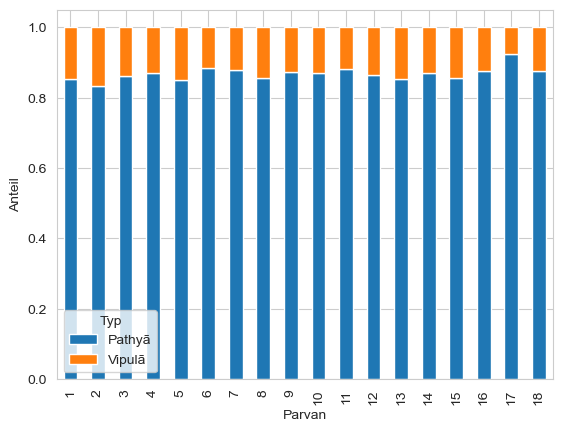

In [15]:
pd.crosstab(shlokas["Parvan"], shlokas["Typ"], 
            normalize="index").plot.bar(stacked=True, ylabel="Anteil")

In [16]:
contingency_parvan_type = pd.crosstab(shlokas["Parvan"], shlokas["Typ"])

scipy.stats.contingency.association(contingency_parvan_type
                                   ), chi2_p(contingency_parvan_type)

(0.03466336527458836, 2.6587384947657215e-27)

In [17]:
shlokas["opening"] = shlokas["Quantitäten"].apply(lambda ls: ls[0:4])
shlokas["semi-cadence"] = shlokas["Quantitäten"].apply(lambda ls: ls[4:7])
shlokas["reopening"] = shlokas["Quantitäten"].apply(lambda ls: ls[8:12])
shlokas["cadence"] = shlokas["Quantitäten"].apply(lambda ls: ls[12:15])

## Welche _Vipulā_ gibt es?

In [18]:
# Vipulās
shlokas["semi-cadence"].value_counts()

LGG    122240
LLL      7351
GGG      5525
GLL      4479
GLG      1893
LLG        49
LGL        34
GGL        11
Name: semi-cadence, dtype: int64

In [19]:
# Cadence
shlokas["cadence"].value_counts()

LGL    141478
GGL       103
LLL         1
Name: cadence, dtype: int64

In [131]:
shlokas[shlokas["cadence"] == "LLL"]["Text"].tolist()

['prajāvāñ śrotriyo yajvā mukto divyais tribhir ṛṇaiḥ']

In [20]:
odd_semi_cadences = shlokas[
    shlokas["semi-cadence"].apply(lambda x: x in ["LGL", "LLG", "GGL"])
][["Text", "semi-cadence"]]
write_table(odd_semi_cadences, "odd_semi_cadences", 
            caption="Verse mit unüblicher semi-cadence.")
odd_semi_cadences

,Text,semi-cadence
Stelle,,
1.1.208c,samāgataiḥ surarṣibhis tulām āropitaṃ purā,LGL
1.10.4a,ekānarthān pṛthagarthān ekaduḥkhān pṛthaksukhān,LLG
1.57.93a,prahrādaśiṣyo nagnajit subalaś cābhavat tataḥ,GGL
1.57.102a,prativindhyo yudhiṣṭhirāt sutasomo vṛkodarāt,LGL
1.92.13e,kulasya ye vaḥ prasthitās tatsādhutvam anuttamam,GGL
...,...,...
13.105.46c,tūṣṇīṃgaṅgāṃ daśagaṅgāṃ mahāhradam athāpi ca,LLG
13.128.50a,yajñopavītadhāraṇaṃ yajño dharmakriyās tathā,LGL
14.7.22c,tāval lokān na labheyaṃ tyajeyaṃ saṃgataṃ yadi,LLG


In [94]:
df_no_pathya = shlokas[shlokas["semi-cadence"] != "LGG"]
contingency_semi_cadence_parvan = pd.crosstab(df_no_pathya["Parvan"], df_no_pathya["semi-cadence"])


In [98]:
write_table(contingency_semi_cadence_parvan, "contingency_semi_cadence_parvan", 
            caption="Verteilung der einzelnen semi-cadences auf die Parvans.", 
            heatmap=True, axis="index")
contingency_semi_cadence_parvan.style.background_gradient(axis="columns", cmap=cm)


semi-cadence,GGG,GGL,GLG,GLL,LGL,LLG,LLL
Parvan,,,,,,,
1,582,2,232,446,3,3,698
2,191,1,113,145,1,3,306
3,841,1,247,590,1,1,1060
4,200,0,41,101,0,0,111
5,523,3,183,329,7,5,586
6,300,1,136,314,2,4,470
7,548,0,195,539,1,4,688
8,243,0,93,272,0,4,358
9,185,0,76,221,0,1,361


In [23]:
scipy.stats.contingency.association(contingency_semi_cadence_parvan
                                   ), chi2_p(contingency_semi_cadence_parvan)

(0.05530947353296606, 1.0689855699091328e-29)

In [24]:
shlokas["cadence"].value_counts(normalize=True) * 100 #/ pd.Series(dict(GGG=36.8, GLG=30.7, LGG=11.1, GGL=10.3, GLL=3.3, LGL=4.9))

LGL    99.926544
GGL     0.072749
LLL     0.000706
Name: cadence, dtype: float64

In [124]:
sequences_at_positions = pd.DataFrame([
    shlokas["opening"].rename("2–4").str[1:].value_counts(normalize=True),
    shlokas["semi-cadence"].rename("5–7").value_counts(normalize=True),
    shlokas["reopening"].rename("10–12").str[1:].value_counts(normalize=True),
    shlokas["cadence"].rename("13–15").value_counts(normalize=True), 
])

In [126]:
write_table(sequences_at_positions, "sequences_at_positions", 
            caption="Häufigkeit metrischer Sequenzen an verschiedenen Positionen im Vers.", 
            heatmap=True, axis="columns")
sequences_at_positions.transpose().style.background_gradient(axis="rows", cmap=cm)

,2–4,5–7,10–12,13–15
LGG,"0,24","0,86","0,27",–
GGG,"0,22","0,04","0,25",–
GLG,"0,18","0,01","0,00",–
GGL,"0,12","0,00","0,18","0,00"
LGL,"0,12","0,00","0,16","1,00"
GLL,"0,11","0,03","0,14",–
LLG,"0,00","0,00","0,00",–
LLL,"0,00","0,05","0,00","0,00"


In [27]:
shlokas["reopening"].value_counts()

GLGG    23963
GGGG    20117
LGGG    15684
GLGL    14689
GGGL    14469
LLGG    13949
GGLL    11946
LGGL    11361
LGLL     8047
LLGL     7311
LGLG       24
GGLG       13
GLLL        5
LLLG        2
GLLG        1
LLLL        1
Name: reopening, dtype: int64

## Zusammenhänge zwischen _semi-cadence_ und _(re)opening_

In [28]:
contingency_semi_cadence_opening = pd.crosstab(shlokas["opening"].str[1:], shlokas["semi-cadence"])

In [29]:
write_table(contingency_semi_cadence_opening, "contingency_semi_cadence_opening", 
            caption="Häufigkeit der Kombinationen aus semi-cadence und opening.", 
            heatmap=True, axis="rows")
contingency_semi_cadence_opening.style.background_gradient(axis="rows", cmap=cm)

semi-cadence,GGG,GGL,GLG,GLL,LGG,LGL,LLG,LLL
opening,,,,,,,,
GGG,50,1,547,247,27633,5,23,2811
GGL,7,1,1,4,17658,1,1,3
GLG,5408,6,1104,4107,13176,25,11,1658
GLL,8,0,0,1,16103,1,0,0
LGG,35,2,237,116,30360,2,13,2879
LGL,15,1,1,2,17295,0,1,0
LLG,2,0,3,2,7,0,0,0
LLL,0,0,0,0,8,0,0,0


In [30]:
scipy.stats.contingency.association(contingency_semi_cadence_opening
                                   ), chi2_p(contingency_semi_cadence_opening)

(0.22932968732027229, 0.0)

In [31]:
contingency_semi_cadence_reopening = pd.crosstab(shlokas["reopening"], shlokas["semi-cadence"])
write_table(contingency_semi_cadence_reopening, "contingency_semi_cadence_reopening", 
            caption="Häufigkeit der Kombinationen aus semi-cadence und reopening.", 
            heatmap=True, axis="rows")

In [32]:
contingency_semi_cadence_reopening.style.background_gradient(axis="rows", cmap=cm)

semi-cadence,GGG,GGL,GLG,GLL,LGG,LGL,LLG,LLL
reopening,,,,,,,,
GGGG,790,3,317,704,17184,5,11,1103
GGGL,621,3,193,431,12469,1,2,749
GGLG,1,0,1,0,11,0,0,0
GGLL,444,1,138,372,10355,1,3,632
GLGG,936,0,318,765,20672,2,9,1261
GLGL,545,0,175,441,12776,0,0,752
GLLG,0,0,0,0,1,0,0,0
GLLL,0,0,0,0,5,0,0,0
LGGG,667,1,228,477,13469,5,13,824


In [33]:
scipy.stats.contingency.association(contingency_semi_cadence_reopening
                                   ), chi2_p(contingency_semi_cadence_reopening)

(0.029813529967451555, 7.576756442581705e-123)

In [34]:
contingency_opening_reopening = pd.crosstab(shlokas["opening"], shlokas["reopening"])

In [35]:
contingency_opening_reopening.style.background_gradient(axis=None, cmap=cm)

reopening,GGGG,GGGL,GGLG,GGLL,GLGG,GLGL,GLLG,GLLL,LGGG,LGGL,LGLG,LGLL,LLGG,LLGL,LLLG,LLLL
opening,,,,,,,,,,,,,,,,
GGGG,2742,1774,1,1457,2870,1700,0,2,2030,1303,1,916,1616,834,1,0
GGGL,1381,963,0,838,1544,952,0,1,1102,736,2,526,858,432,0,0
GGLG,1783,1280,3,947,2046,1212,0,0,1393,987,2,661,1317,614,1,0
GGLL,1142,870,1,794,1531,936,0,0,954,724,3,488,887,467,0,0
GLGG,3017,2227,5,1828,3671,2277,1,1,2266,1621,5,1231,2107,1113,0,0
GLGL,1586,1197,0,957,1952,1277,0,0,1239,986,1,693,1167,618,0,0
GLLG,2,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0
GLLL,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0
LGGG,2076,1438,0,1158,2427,1456,0,0,1592,1062,2,748,1383,728,0,0


In [36]:
scipy.stats.contingency.association(contingency_opening_reopening
                                   ), chi2_p(contingency_opening_reopening)

(0.014014157267420998, 1.1952172235170366e-13)

In [37]:
opening_reopening = pd.DataFrame([
    shlokas["opening"].value_counts(),
    shlokas["reopening"].value_counts()
])
write_table(opening_reopening, "opening_reopening", 
            caption="Häufigkeitsvergleich der openings und reopenings", 
            heatmap=True, axis="columns")
opening_reopening.style.background_gradient(axis="columns", cmap=cm)

,GLGG,GGGG,LGGG,LGLG,LLGG,GGLG,GLGL,GGGL,GGLL,LGGL,LGLL,LLGL,GLLG,GLLL,LLLG,LLLL
opening,21370,17247,14070,13249,12274,12246,11673,9335,8797,8341,7316,5642,9,6,5,2
reopening,23963,20117,15684,24,13949,13,14689,14469,11946,11361,8047,7311,1,5,2,1


# Einzelne _akṣara_ im Vers

In [117]:
shlokas["tmp_syllables"] = shlokas.apply(
    lambda row: [{
        "Silbe": syllable,
        "Position": pos_quantity[0],
        "Quantität": pos_quantity[1],
        "Silbenschema": syllable_symbols.replace(" ", "")
    } for pos_quantity, syllable, syllable_symbols in zip(
        enumerate(row["Quantitäten"], start=1),
        row["Silben"].split("."),
        row["Silbenschema"].split(".")
    )], axis=1
)
silbenweise = shlokas.explode("tmp_syllables")
for key in ["Position", "Quantität", "Silbe", "Silbenschema"]:
    silbenweise[key] = silbenweise["tmp_syllables"].apply(lambda x: x[key])
shlokas.drop(columns="tmp_syllables", inplace=True)

In [39]:
contingency_syllable_position = pd.crosstab(silbenweise["Silbenschema"], silbenweise["Position"])
write_table(contingency_syllable_position, "contingency_syllable_position", 
            caption="Häufigkeit der Silbenformen an den einzelnen Positionen", 
            heatmap=True, axis="rows")
contingency_syllable_position.style.background_gradient(axis="rows", cmap=cm)

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Silbenschema,,,,,,,,,,,,,,,,
V,6,54,75,70,27,13,0,465,5,106,144,123,0,214,0,28196
VC,30215,36766,40122,38402,4390,49735,61263,31921,30128,34267,50001,31099,0,59265,0,26016
VCC,9403,13606,15470,14336,2333,20444,19461,19301,12615,12907,19259,12649,0,22583,0,0
VCCC,902,1538,1860,1492,239,2673,2381,2980,900,1725,2808,1380,0,1722,0,0
VCCCC,19,25,22,31,10,23,54,98,30,30,28,20,0,34,0,0
VCCCCC,3,1,3,0,0,33,0,1,3,0,7,0,0,0,0,0
v,295,396,261,261,267,42,0,963,130,426,327,572,594,0,0,27954
vC,60628,50594,41379,50851,129419,13737,11875,42807,56253,59498,19715,67257,140887,1,141582,59416
vCC,36673,34446,38148,33199,4505,48798,43111,36530,37730,29714,44330,25830,101,54204,0,0


In [40]:
pd.DataFrame(silbenweise["Silbenschema"].value_counts(normalize=True))

,Silbenschema
vC,0.417558
VC,0.231134
vCC,0.206293
VCC,0.085801
vCCC,0.021392
v,0.014342
V,0.013022
VCCC,0.009977
vCCCC,0.000272
VCCCC,0.000187


In [118]:
x = silbenweise
x[["Position ", "Pāda "]] = pd.DataFrame(x["Position"].apply(lambda x: ((x-1)%8+1, "ac" if x < 9 else "bd")).tolist(), index=x.index)
contingency_quantity_position = pd.crosstab([x["Pāda "], x["Quantität"]], x["Position "])
write_table(contingency_quantity_position, "contingency_quantity_position", 
            caption="Häufigkeit der Quantitäten an den einzelnen Vers-Positionen", 
            heatmap=True, axis="columns")

In [119]:
contingency_quantity_position.style.background_gradient(axis="columns", cmap=cm)

In [43]:
non_normalized = pd.crosstab(silbenweise["Quantität"], 
                             silbenweise["Position"])
scipy.stats.contingency.association(non_normalized
                                   ), chi2_p(non_normalized)

(0.6108852283911652, 0.0)

In [44]:
nur_guru = silbenweise[(silbenweise["Quantität"] == "G") & (silbenweise["Position"] < 9)]

In [45]:
contingency_semi_cadence_guru = pd.crosstab(
    nur_guru["semi-cadence"], 
    nur_guru["Position"],
).sort_values(1, ascending=False)
write_table(contingency_semi_cadence_guru, "contingency_semi_cadence_guru", 
            caption="Häufigkeit schwerer Silben, abhängig von der semi-cadence des Verses", 
            heatmap=True, axis="columns")

In [46]:
contingency_semi_cadence_guru.style.background_gradient(axis="columns", cmap=cm)

Position,1,2,3,4,5,6,7,8
semi-cadence,,,,,,,,
LGG,70443,74570,92946,71176,0,122240,122240,81676
LLL,4345,4472,5693,7348,0,0,0,6975
GGG,2565,5473,107,5495,5525,5525,5525,3624
GLL,2235,4359,369,4472,4479,0,0,4107
GLG,1048,1652,786,1891,1893,0,1893,1443
LLG,33,35,38,47,0,0,49,43
LGL,8,32,8,32,0,34,0,15
GGL,6,8,5,9,11,11,0,10


In [47]:
nur_guru

,Parvan,Adhyāya,Śloka,Pāda,Art,Text,Silben,Silbenschema,Quantitäten + Wortgrenzen,Quantitäten,Silbenzahl,Typ,opening,semi-cadence,reopening,cadence,tmp_syllables,Position,Quantität,Silbe
Stelle,,,,,,,,,,,,,,,,,,,,
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,VC,GGLG.LGGL.LG.GL.LGLL,GGLGLGGLLGGLLGLL,16,Pathyā,GGLG,LGG,LGGL,LGL,"{'Silbe': 'Ar', 'Position': 1, 'Quantität': 'G...",1,G,Ar
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,VC,GGLG.LGGL.LG.GL.LGLL,GGLGLGGLLGGLLGLL,16,Pathyā,GGLG,LGG,LGGL,LGL,"{'Silbe': 'Ay', 'Position': 2, 'Quantität': 'G...",2,G,Ay
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,vCC,GGLG.LGGL.LG.GL.LGLL,GGLGLGGLLGGLLGLL,16,Pathyā,GGLG,LGG,LGGL,LGL,"{'Silbe': 'aM n', 'Position': 4, 'Quantität': ...",4,G,aM n
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,vCC,GGLG.LGGL.LG.GL.LGLL,GGLGLGGLLGGLLGLL,16,Pathyā,GGLG,LGG,LGGL,LGL,"{'Silbe': 'ask', 'Position': 6, 'Quantität': '...",6,G,ask
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,vCC,GGLG.LGGL.LG.GL.LGLL,GGLGLGGLLGGLLGLL,16,Pathyā,GGLG,LGG,LGGL,LGL,"{'Silbe': 'Rty', 'Position': 7, 'Quantität': '...",7,G,Rty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18.5.53a,18,5,53,a,Verse,mahābhāratam ākhyānaṃ yaḥ paṭhet susamāhitaḥ,ah.Abh.Ar.at.am .Akhy.An.aM y.aH p.aTh.et s.us...,vCC,LGGLL.GGG.G.LG.LLGLL,LGGLLGGGGLGLLGLL,16,Pathyā,LGGL,LGG,GLGL,LGL,"{'Silbe': 'aM y', 'Position': 8, 'Quantität': ...",8,G,aM y
18.5.53c,18,5,53,c,Verse,sa gacchet paramāṃ siddhim iti me nāsti saṃśayaḥ,a g.acch.et p.ar.am.AM s.iddh.im .it.i m.e n.A...,vCC,L.GG.LLG.GL.LL.G.GL.GLL,LGGLLGGLLLGGLGLL,16,Pathyā,LGGL,LGG,LLGG,LGL,"{'Silbe': 'acch', 'Position': 2, 'Quantität': ...",2,G,acch
18.5.53c,18,5,53,c,Verse,sa gacchet paramāṃ siddhim iti me nāsti saṃśayaḥ,a g.acch.et p.ar.am.AM s.iddh.im .it.i m.e n.A...,VCC,L.GG.LLG.GL.LL.G.GL.GLL,LGGLLGGLLLGGLGLL,16,Pathyā,LGGL,LGG,LLGG,LGL,"{'Silbe': 'et p', 'Position': 3, 'Quantität': ...",3,G,et p


In [48]:
# no effect to be seen, also tried with .reopening and .cadence
pd.crosstab(
    nur_guru["reopening"], 
    nur_guru["Position"]
).sort_values(by=1,ascending=False).style.background_gradient(axis="columns", cmap=cm)

Position,1,2,3,4,5,6,7,8
reopening,,,,,,,,
GLGG,13619,15372,16833,15276,2019,21610,21935,16929
GGGG,11653,13066,14428,13276,1814,17982,18302,13952
LGGG,8986,10230,11063,10154,1373,14142,14377,10645
GLGL,8357,9222,10403,9222,1161,13321,13496,10223
GGGL,8311,9146,10295,9326,1248,13094,13285,9833
LLGG,7952,8966,9712,8843,1093,12673,12847,9402
GGLL,6821,7632,8458,7559,955,10801,10940,8174
LGGL,6359,7267,7907,7124,1004,10254,10384,7897
LGLL,4516,5046,5683,5019,651,7251,7367,5718


In [49]:
effects = np.ndarray((16,16))

for i in range(16):
    for j in range(16):
        contingency = pd.crosstab(
            shlokas["Quantitäten"].str[i], 
            shlokas["Quantitäten"].str[j]
        )
        if chi2_p(contingency) < SIGNIFICANCE:
            effects[i, j] = scipy.stats.contingency.association(contingency) 
        else:
            effects[i, j] = np.nan

In [50]:
cross_syllable_effects = pd.DataFrame(effects).rename(index=lambda x: x+1, columns=lambda x: x+1)
write_table(cross_syllable_effects, "cross_syllable_effects", 
            caption="Zusammenhänge zwischen den Quantitäten einzelner Silben " 
                    "(Cramérs $V$, nur signifikante Effekte: $p < 0.01$)", 
            heatmap=True, axis=None)

In [51]:
cross_syllable_effects.style.background_gradient(axis=None, cmap=cm)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,"1,00","0,12","0,08","0,02","0,05","0,01","0,01","0,01",–,–,–,–,–,–,–,"0,01"
2,"0,12","1,00","0,48","0,03","0,21","0,08","0,07","0,01",–,–,–,"0,01",–,–,–,–
3,"0,08","0,48","1,00","0,04","0,40","0,15","0,13","0,04","0,01",–,–,–,–,–,–,–
4,"0,02","0,03","0,04","1,00","0,23","0,25","0,23",–,"0,01","0,01","0,01","0,01",–,–,–,–
5,"0,05","0,21","0,40","0,23","1,00","0,45","0,32","0,05",–,"0,01",–,–,–,–,–,–
6,"0,01","0,08","0,15","0,25","0,45","1,00","0,92","0,16",–,"0,01",–,–,–,–,–,–
7,"0,01","0,07","0,13","0,23","0,32","0,92","1,00","0,16",–,–,–,–,–,–,–,–
8,"0,01","0,01","0,04",–,"0,05","0,16","0,16","1,00",–,–,–,–,–,–,–,"0,01"
9,–,–,"0,01","0,01",–,–,–,–,"1,00","0,08",–,"0,01",–,–,–,–
10,–,–,–,"0,01","0,01","0,01",–,–,"0,08","1,00","0,35","0,19",–,–,–,–


In [52]:
counts_laghu = np.ndarray((16,16))
counts_guru = np.ndarray((16,16))

for i in range(16):
    for j in range(16):
        try:
            counts_laghu[i, j] = shlokas[
                shlokas["Quantitäten"].str[i] == "L"
            ]["Quantitäten"].str[j].value_counts(normalize=True)["G"]
        except:
            counts_laghu[i, j] = 0
        try:
            counts_guru[i, j] = shlokas[
                shlokas["Quantitäten"].str[i] == "G"
            ]["Quantitäten"].str[j].value_counts(normalize=True)["G"]
        except:
            counts_guru[i, j] = 0

In [53]:
conditioned_syllable_laghu = pd.DataFrame(counts_laghu).rename(
    index=lambda x: f"{x+1}=L", columns=lambda x: f"→{x+1}=G"
)
write_table(conditioned_syllable_laghu, "conditioned_syllable_laghu", 
            caption="Bedingte Wahrscheinlichkeiten für schwere Silben, "
                    "abhängig von einer bestimmten leichten Silbe",
            heatmap=True, axis=None)
conditioned_syllable_laghu.style.background_gradient(axis=None, cmap=cm)

,→1=G,→2=G,→3=G,→4=G,→5=G,→6=G,→7=G,→8=G,→9=G,→10=G,→11=G,→12=G,→13=G,→14=G,→15=G,→16=G
1=L,"0,00","0,71","0,66","0,65","0,10","0,90","0,91","0,70","0,60","0,57","0,86","0,52","0,00","1,00","0,00","0,38"
2=L,"0,65","0,00","1,00","0,66","0,01","0,94","0,94","0,68","0,60","0,57","0,86","0,51","0,00","1,00","0,00","0,38"
3=L,"0,51","1,00","0,00","0,61","0,26","0,83","0,86","0,72","0,60","0,57","0,86","0,52","0,00","1,00","0,00","0,38"
4=L,"0,58","0,66","0,68","0,00","0,00","1,00","1,00","0,69","0,60","0,57","0,85","0,51","0,00","1,00","0,00","0,38"
5=L,"0,58","0,61","0,76","0,61","0,00","0,94","0,94","0,68","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
6=L,"0,56","0,76","0,50","1,00","0,46","0,00","0,14","0,91","0,61","0,59","0,86","0,53","0,00","1,00","0,00","0,39"
7=L,"0,56","0,75","0,51","1,00","0,38","0,00","0,00","0,94","0,61","0,59","0,86","0,53","0,00","1,00","0,00","0,39"
8=L,"0,58","0,63","0,73","0,64","0,06","0,97","0,98","0,00","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,37"
9=L,"0,57","0,64","0,70","0,63","0,08","0,90","0,92","0,69","0,00","0,62","0,86","0,53","0,00","1,00","0,00","0,38"
10=L,"0,57","0,64","0,70","0,63","0,08","0,91","0,92","0,70","0,65","0,00","1,00","0,63","0,00","1,00","0,00","0,38"


In [54]:
conditioned_syllable_guru = pd.DataFrame(counts_guru).rename(
    index=lambda x: f"{x+1}=G", columns=lambda x: f"→{x+1}=G"
)
write_table(conditioned_syllable_guru, "conditioned_syllable_guru", 
            caption="Bedingte Wahrscheinlichkeiten für schwere Silben, "
                    "abhängig von einer bestimmten leichten Silbe",
            heatmap=True, axis=None)
conditioned_syllable_guru.style.background_gradient(axis=None, cmap=cm)

,→1=G,→2=G,→3=G,→4=G,→5=G,→6=G,→7=G,→8=G,→9=G,→10=G,→11=G,→12=G,→13=G,→14=G,→15=G,→16=G
1=G,"1,00","0,59","0,74","0,63","0,07","0,91","0,92","0,69","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,39"
2=G,"0,53","1,00","0,54","0,63","0,13","0,88","0,90","0,70","0,60","0,58","0,86","0,53","0,00","1,00","0,00","0,38"
3=G,"0,60","0,49","1,00","0,65","0,01","0,93","0,94","0,68","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
4=G,"0,56","0,63","0,72","1,00","0,13","0,85","0,87","0,69","0,60","0,58","0,86","0,53","0,00","1,00","0,00","0,39"
5=G,"0,49","0,97","0,11","1,00","1,00","0,46","0,62","0,77","0,60","0,59","0,86","0,53","0,00","1,00","0,00","0,39"
6=G,"0,57","0,63","0,73","0,60","0,04","1,00","1,00","0,67","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
7=G,"0,57","0,63","0,72","0,61","0,06","0,99","1,00","0,67","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
8=G,"0,57","0,64","0,69","0,64","0,09","0,87","0,89","1,00","0,60","0,57","0,86","0,52","0,00","1,00","0,00","0,39"
9=G,"0,57","0,64","0,71","0,64","0,08","0,90","0,92","0,69","1,00","0,55","0,86","0,52","0,00","1,00","0,00","0,38"
10=G,"0,57","0,64","0,71","0,64","0,09","0,90","0,91","0,69","0,57","1,00","0,75","0,44","0,00","1,00","0,00","0,38"


In [55]:
def cross_examine(position1, position2):
    return pd.crosstab(
        shlokas["Quantitäten"].str[position1-1].rename(position1), 
        shlokas["Quantitäten"].str[position2-1].rename(position2)
    )

In [56]:
cross_examine(3,5) 

5,G,L
3,,
G,1267,98685
L,10641,30989


In [57]:
# Piṅgala Syllables 2 and 3
cross_examine(2, 3)

3,G,L
2,,
G,48993,41608
L,50959,22


In [58]:
cross_examine(10,11)

11,G,L
10,,
G,61631,20030
L,59912,9


In [59]:
cross_examine(11,12)

12,G,L
11,,
G,73713,47830
L,40,19999


In [60]:
shlokas["Quantitäten"].str[1:3].value_counts()

LG    50959
GG    48993
GL    41608
LL       22
Name: Quantitäten, dtype: int64

In [61]:
shlokas["Quantitäten"].str[9:12].value_counts()

LGG    37912
GGG    35801
GGL    25830
LGL    22000
GLL    19993
GLG       37
LLL        6
LLG        3
Name: Quantitäten, dtype: int64

In [62]:
effects_quarter = np.ndarray((4,4))
quarters = ["opening", "semi-cadence", "reopening", "cadence"]
for i, quarter_i in enumerate(quarters):
    for j, quarter_j in enumerate(quarters):
        contingency = pd.crosstab(
            shlokas[quarter_i],
            shlokas[quarter_j]
        )
        if chi2_p(contingency) < SIGNIFICANCE:      
            effects_quarter[i, j] = scipy.stats.contingency.association(contingency) 
        else:
            effects_quarter[i, j] = np.nan

In [63]:
cross_quarter_effects = pd.DataFrame(effects_quarter).rename(index=lambda x: quarters[x], 
                                                             columns=lambda x: quarters[x])
write_table(cross_quarter_effects, "cross_quarter_effects", 
            caption="Zusammenhänge zwischen den Quantitäten einzelner Viertel "
                    "(Cramérs $V$, nur signifikante Effekte: $p < 0.01$)", 
            heatmap=True, axis=None)
cross_quarter_effects.style.background_gradient(axis=None, cmap=cm)

,opening,semi-cadence,reopening,cadence
opening,"1,00","0,23","0,01",–
semi-cadence,"0,23","1,00","0,03",–
reopening,"0,01","0,03","1,00",–
cadence,–,–,–,"1,00"


# Wortgrenzen und Zäsuren

In [64]:
def enumerate_sublists(lists):
    index = 1
    result = []
    for element in lists:
        result.append((index, element))
        index += len(element)
    return result

In [65]:
shlokas["tmp_words"] = shlokas.apply(
    lambda row: [{
        "Wort": word, 
        "Position": pos_sequence[0], 
        "Sequenz": pos_sequence[1]
    } for pos_sequence, word in zip(
        enumerate_sublists(row["Quantitäten + Wortgrenzen"].split(".")), 
        row["Text"].split(" ")
    )], axis=1)
wortweise = shlokas.explode("tmp_words")
for key in ["Position", "Sequenz", "Wort"]:
    wortweise[key] = wortweise["tmp_words"].apply(lambda x: x[key])
wortweise["Position "] = (wortweise["Position"] - 1) % 8 + 1
wortweise["Pāda "] = wortweise["Position"].apply(lambda position: "bd" if position > 8 else "ac")
shlokas.drop(columns="tmp_words", inplace=True)

In [66]:
break_positions = pd.crosstab(wortweise["Pāda "], wortweise["Position "])

write_table(break_positions, "break_positions", 
            caption="Häufigkeit von Wortgrenzen an einer bestimmten Position",
            heatmap=True, axis=None)


break_positions.style.background_gradient(axis=None, cmap=cm)

Position%8,1,2,3,4,5,6,7,8
Pāda,,,,,,,,
"a, c",141582,18360,49881,53256,52203,38150,56525,15503
"b, d",141487,11195,45979,54334,55153,31530,36014,8308


In [67]:
wortweise[wortweise.Position > 8].Position.count()

384000

In [68]:
wortweise[wortweise.Position <= 8].Position.count()

425460

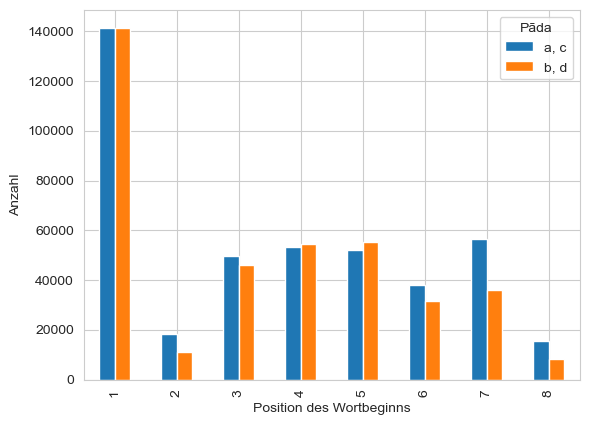

In [69]:
pd.crosstab(wortweise["Position%8"], wortweise["Pāda"]).plot.bar(xlabel="Position des Wortbeginns", 
                                                           ylabel="Anzahl")
write_figure("caesura")

In [70]:
def break_patterns(quantities):
    all_indices = [(k-1) for k, v in enumerate_sublists(quantities.split("."))]
    first_half = [i for i in all_indices if i < 8]
    second_half = [i%8 for i in all_indices if i >= 8]
    return [
        "".join(str(i) if i in first_half else "–" for i in range(1,8)),
        "".join(str(i) if i in second_half else "–" for i in range(1,8)),
    ]

In [71]:
df = pd.DataFrame(shlokas["Quantitäten + Wortgrenzen"].rename("halves").apply(break_patterns))
df[["1–8", "9–16"]] = pd.DataFrame(df["halves"].tolist(), index=df.index)
df["1–4"] = df["1–8"].str[0:4]
df["5–7"] = df["1–8"].str[4:8]
df["9–12"] = df["9–16"].str[0:4]
df["13–15"] = df["9–16"].str[4:8]

In [72]:
df["13–15"].value_counts()["–6–"], df["5–7"].value_counts()["–6–"]

(31778, 48835)

In [73]:
cross_breaks_odd = pd.crosstab(df["1–4"], df["5–7"])

write_table(cross_breaks_odd, "cross_breaks_odd", 
            caption="Wortgrenzenmuster (ungerade pādas)", 
            heatmap=True, axis=None)

cross_breaks_odd.style.background_gradient(axis=None, cmap=cm)

5–7,567,56–,5–7,5––,–67,–6–,––7,–––
1–4,,,,,,,,
1234,0,5,2,13,3,40,14,34
123–,0,25,14,95,39,364,19,186
12–4,1,38,48,110,33,659,85,965
12––,2,101,75,758,76,856,68,441
1–34,1,29,14,79,12,275,33,290
1–3–,9,104,100,1017,115,2689,335,1780
1––4,1,62,35,256,46,1045,135,1500
1–––,1,149,121,1409,37,674,62,421
–234,2,7,16,63,15,270,38,411


In [74]:
cross_breaks_even = pd.crosstab(df["9–12"], df["13–15"])

write_table(cross_breaks_even, "cross_breaks_even", 
            caption="Wortgrenzenmuster (gerade pādas)", 
            heatmap=True, axis=None)

cross_breaks_even.style.background_gradient(axis=None, cmap=cm)

13–15,567,56–,5–7,5––,–67,–6–,––7,–––
9–12,,,,,,,,
1234,1,1,0,3,0,15,6,55
123–,0,14,4,111,3,123,7,212
12–4,0,20,5,86,6,329,35,990
12––,2,64,16,624,10,395,7,272
1–34,0,17,3,124,2,109,33,329
1–3–,1,75,55,724,55,1118,133,1786
1––4,2,32,18,213,8,420,75,1138
1–––,3,124,33,611,3,257,14,188
–234,0,7,1,42,9,112,27,469


In [75]:
w = wortweise[wortweise["Position"] < 9]
contingency_semi_cadence_break_position = pd.crosstab(
    w["semi-cadence"], 
    w["Position"]
).sort_values(1, ascending=False)
write_table(contingency_semi_cadence_break_position, "contingency_semi_cadence_break_position", 
            caption="Häufigkeit eines Wortanfangs, abhängig von der semi-cadence", 
            heatmap=True, axis="columns")

In [76]:
contingency_semi_cadence_break_position.style.background_gradient(axis="columns", cmap=cm)

Position,1,2,3,4,5,6,7,8
semi-cadence,,,,,,,,
LGG,122240,15770,42998,49071,45508,26302,54322,14198
LLL,7351,819,2835,1582,3169,3621,834,104
GGG,5525,844,1973,1617,310,5438,503,855
GLL,4479,748,1388,916,1321,2708,709,90
GLG,1893,159,650,63,1831,47,152,252
LLG,49,2,13,1,47,4,1,4
LGL,34,17,21,1,12,21,2,0
GGL,11,1,3,5,5,9,2,0


In [77]:
scipy.stats.contingency.association(contingency_semi_cadence_break_position
                                   ), chi2_p(contingency_semi_cadence_break_position)

(0.09528049488080531, 0.0)

In [78]:
positions = wortweise[wortweise["Position"] < 9]["Position"].unique()

def word_break_at(position, qs):
    for index, sublist in enumerate_sublists(qs.split(".")):
        if index == position:
            return True
    return False

effects_break = np.zeros(positions.size)
for position in positions:
    contingency = pd.crosstab(
        shlokas["semi-cadence"],
        shlokas["Quantitäten + Wortgrenzen"].apply(lambda qs: word_break_at(position, qs))
    )
    if chi2_p(contingency) < SIGNIFICANCE:
        effects_break[position-1] = scipy.stats.contingency.association(contingency) 
    else:
        effects_break[position-1] = np.nan

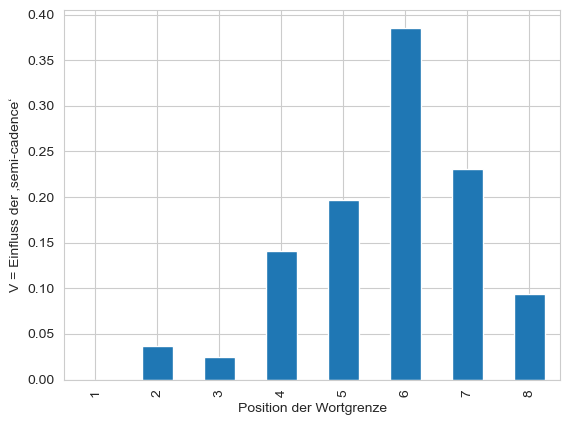

In [79]:
pd.Series(effects_break, index=range(1,8+1)).plot.bar(xlabel="Position der Wortgrenze", 
                                                        ylabel="V = Einfluss der ‚semi-cadence‘")
write_figure("effect-caesura")

In [80]:
wortweise["Sequenz"].value_counts().head(50)

GG        116568
LG         74203
L          62524
G          59845
GLG        46477
GL         45310
LL         38458
LLG        35444
GGG        30005
GGL        26636
LGLL       24993
LGG        21142
GLL        19592
GLGG       18982
LGLG       16954
LGGG       16427
LGL        11409
LGGL       10532
LLGG        8245
LLGLL       8075
GGLG        7643
GLGLL       6296
GLLG        6045
GLGL        5715
GLGGL       5555
GGGG        4995
LLLG        4454
LLGLG       4213
LLGGL       4040
LLGL        3808
GLGLG       3672
GLGGG       3467
            2884
LLGGG       2726
LLL         2344
GGGL        2248
GLGLLG      1741
GGLGG       1688
LGLGG       1604
GLLGLL      1419
GGLLLG      1399
GGGGL       1348
GGLL        1215
LLLGLL      1144
GGLGLL      1128
GLGGLG      1087
LGLLLG      1076
LGGGL       1013
GGLGLG      1000
GLLGLG       997
Name: Sequenz, dtype: int64

In [81]:
wortweise["Sequenz"].value_counts().head(50).sum() / wortweise["Sequenz"].count()

0.9633397573691103

In [82]:
contingency_sequence_position = pd.crosstab(
    wortweise["Sequenz"], 
    wortweise["Position"]
).transpose()
# sort by sum (i. e. how often the sequence is used overall)
contingency_sequence_position = contingency_sequence_position[
    contingency_sequence_position.sum().sort_values(ascending=False).index
].transpose()
write_table(contingency_sequence_position.head(50), "contingency_sequence_position", 
            caption="Lokalisierung der 50 häufigsten metrischen Worttypen im Vers", 
            heatmap=True, axis="columns")

In [83]:
small_words = wortweise[wortweise["Wort"].apply(lambda x: x in["ca", "tu", "hi", "na", "tv", "hy", "cana", "api", "eva", "iva"])]

In [84]:
contingency_sequence_position.head(50).style.background_gradient(axis=None, cmap=cm)

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Sequenz,,,,,,,,,,,,,,,,
GG,18958,3405,11181,2099,1,4009,41895,0,20727,2575,11708,10,0,0,0,0
LG,15006,1877,2018,6,16205,3,1376,0,12560,1336,3,1,9431,0,14381,0
L,7522,2681,4434,4200,8911,551,56,8361,4069,1386,1734,4574,6762,0,1137,6146
G,10483,2488,5613,3744,569,4963,1887,7137,7050,2030,4938,3734,25,3022,0,2162
GLG,8916,644,2,9140,228,11,0,0,11669,0,6,5381,0,10480,0,0
GL,7002,1600,2611,5204,304,0,10768,0,5600,653,4516,5430,0,1622,0,0
LL,3193,0,944,3457,350,96,115,0,3466,0,1645,4833,1,0,20358,0
LLG,5425,1,2,9621,3,5343,0,0,7696,0,11,7342,0,0,0,0
GGG,6887,430,22,1,2,13447,0,1,8789,394,32,0,0,0,0,0


In [85]:
scipy.stats.contingency.association(contingency_sequence_position
                                   ), chi2_p(contingency_sequence_position)

(0.4903833915037389, 0.0)

# Piṅgalas Verbote

In [86]:
short23 = shlokas[
    (shlokas.reopening.str[1:3] == "LL") | (shlokas.opening.str[1:3] == "LL")
][["Text", "Quantitäten"]]
write_table(short23, "short23", caption="Verse mit Doppelkürze in der Mitte des (re)openings")
short23

,Text,Quantitäten
Stelle,,
1.2.158c,adhyāyānāṃ śataṃ proktaṃ saptadaśa tathāpare,GGGGLGGGGLLLLGLG
1.2.234a,etad akhilam ākhyātaṃ bhārataṃ parvasaṃgrahāt,GLLLLGGGGLGGLGLG
1.39.29c,yad gṛhītaṃ phalaṃ rājñā tatra kṛmir abhūd aṇuḥ,GLGGLGGGGLLLLGLL
1.99.41a,katham arājakaṃ rāṣṭraṃ śakyaṃ dhārayituṃ prabho,LLLGLGGGGGGLLGLG
1.158.14a,na kuṇapāḥ śṛṅgiṇo vā na devā na ca mānuṣāḥ,LLLGGLGGLGGLLGLG
2.10.4a,raśmivatī bhāsvarā ca divyagandhā manoramā,GLLGGLGLGLGGLGLG
2.19.10a,aparihāryā meghānāṃ māgadheyaṃ maṇeḥ kṛte,LLLGGGGGGLGGLGLG
3.222.36c,nāpi parivade śvaśrūṃ sarvadā pariyantritā,GLLLLGGGGLGLLGLG
3.222.39c,nāpi parivade cāhaṃ tāṃ pṛthāṃ pṛthivīsamām,GLLLLGGGGLGLLGLG


In [87]:
reopening_glg = shlokas[(shlokas.reopening.str[1:4] == "GLG")][["Text", "Quantitäten"]]
write_table(reopening_glg, "reopening_glg", caption="Verse mit der Sequenz GLG vor der Kadenz")
reopening_glg
# Interessant auch die Verteilung auf die Parvans: ["parva"].value_counts()

,Text,Quantitäten
Stelle,,
2.47.9a,indrakṛṣṭair vartayanti dhānyair nadīmukhaiś c...,GLGGGLGLGGLGLGLG
3.17.19c,cikṣepa tarasā vīro vyāvidhya satyavikramaḥ,GGLLLGGGGGLGLGLL
3.104.7c,vaśe ca kṛtvā rājño 'nyān svarājyam anvaśāsata,LGLGGGGGLGLGLGLL
3.188.61a,dasyuprapīḍitā rājan kākā iva dvijottamāḥ,GGLGLGGGGGLGLGLG
4.32.8a,tau nihatya pṛthag dhuryāv ubhau ca pārṣṇisārathī,GLGLLGGGLGLGLGLG
5.36.14a,yato yato nivartate tatas tato vimucyate,LGLGLGLGLGLGLGLG
5.36.14c,nivartanād dhi sarvato na vetti duḥkham aṇv api,LGLGLGLGLGLGLGLL
5.103.38a,yathaiveśvarasṛṣṭo 'smi yad bhāvi yā ca me gatiḥ,LGGLLGGLGGLGLGLL
6.7.18a,tumburur nāradaś caiva viśvāvasur hahā huhūḥ,GLGGLGGLGGLGLGLG


# Moren (_mātrā_)

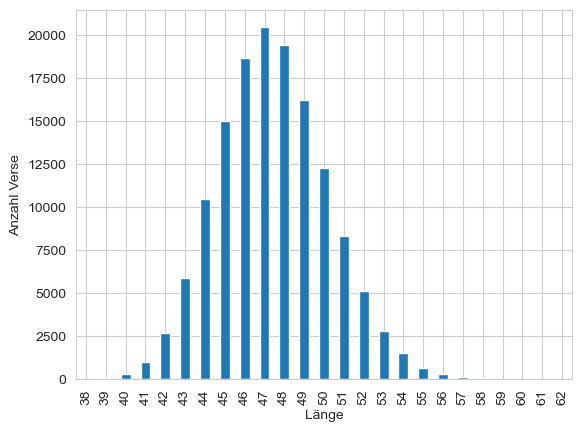

In [88]:
shlokas["Länge"] = shlokas["Silbenschema"].apply(lambda sc: sum(2 if x == "V" else 0 if x == "." else 1 for x in sc))
shlokas["Länge"].value_counts().sort_index().plot.bar(xlabel="Länge", ylabel="Anzahl Verse")
write_figure("verse-lengths")

In [89]:
shlokas["Länge"].mean(), shlokas["Länge"].std()

(47.42254665141049, 2.77344945100986)

In [90]:
shlokas.sort_values(by="Länge")[["Text", "Quantitäten", "Länge"]].iloc[np.r_[0:8, -8:0]]

,Text,Quantitäten,Länge
Stelle,,,
3.146.26a,abhirāmanadīkuñjanirjharodarakandaram,LLGLLGGLGLGLLGLL,38
7.113.25e,nipātitadhvajarathaṃ hatavājinaradvipam,LGLGLLLGLLGLLGLL,38
15.45.10a,vanavāsanivṛtteṣu bhavatsu kurunandana,LLGLLGGLLGLLLGLL,38
6.77.32c,śaktitomaranārācagadāparighapāṇayaḥ,GLGLLGGLLGLLLGLL,38
5.154.22c,yudhiṣṭhireṇa sahita upāviśad ariṃdamaḥ,LGLGLLLLLGLLLGLL,38
12.291.31a,sadaṃśakīṭamaśake sapūtikṛmimūṣake,LGLGLLLGLGLLLGLG,38
13.16.14a,viśvāvasuhiraṇyākṣapuruhūtanamaskṛta,GGLLLGGLLLGLLGLL,38
3.166.9c,tathā śūlāsiparaśugadāmusalapāṇayaḥ,LGGGLLLLLGLLLGLL,38
14.78.6c,yas tvaṃ strīvad yudhā prāptaṃ sāmnā māṃ praty...,GGGGLGGGGGGGLGLG,60


# Einfluss auf den nächsten Vers?

In [91]:
previous_next = pd.DataFrame([shlokas["Quantitäten"].rename("previous").reset_index(drop=True), shlokas["Quantitäten"][1:].reset_index(drop=True).rename("next")]).transpose()

In [92]:
effects_quarter = np.ndarray((4,4))
quarters = ["opening", "semi-cadence", "reopening", "cadence"]

def index_with(quarter, string):
    if quarter == "opening":
        return string[0:4]
    elif quarter == "semi-cadence":
        return string[4:7]
    elif quarter == "reopening":
        return string[8:12]
    elif quarter == "cadence":
        return string[12:15]

for i, quarter_i in enumerate(quarters):
    for j, quarter_j in enumerate(quarters):
        contingency = pd.crosstab(
            index_with(quarter_i, previous_next["previous"].str),
            index_with(quarter_j, previous_next["next"].str)
        )
        if chi2_p(contingency) < SIGNIFICANCE:      
            effects_quarter[i, j] = scipy.stats.contingency.association(contingency) 
        else:
            effects_quarter[i, j] = np.nan

In [93]:
cross_quarter_effects = pd.DataFrame(effects_quarter).rename(index=lambda x: quarters[x] + "(1)", 
                                                             columns=lambda x: quarters[x] + "(2)")
cross_quarter_effects

,opening(2),semi-cadence(2),reopening(2),cadence(2)
opening(1),0.016088,0.013290,0.012993,NaN
semi-cadence(1),0.016892,0.017271,0.018423,NaN
reopening(1),NaN,0.016380,0.019640,NaN
cadence(1),NaN,NaN,NaN,0.013226
